In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [123]:
train=pd.read_excel('Data_Train.xlsx')
train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [124]:
test=pd.read_excel('Test_set.xlsx')
test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [125]:
final=train.append(test)
final.head()

C:\Users\NIKITA\AppData\Local\Temp\ipykernel_15384\1513558460.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final=train.append(test)


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0


In [126]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Date_of_Journey  13354 non-null  object 
 2   Source           13354 non-null  object 
 3   Destination      13354 non-null  object 
 4   Route            13353 non-null  object 
 5   Dep_Time         13354 non-null  object 
 6   Arrival_Time     13354 non-null  object 
 7   Duration         13354 non-null  object 
 8   Total_Stops      13353 non-null  object 
 9   Additional_Info  13354 non-null  object 
 10  Price            10683 non-null  float64
dtypes: float64(1), object(10)
memory usage: 1.2+ MB


In [127]:
final.isnull().sum()

Airline               0
Date_of_Journey       0
Source                0
Destination           0
Route                 1
Dep_Time              0
Arrival_Time          0
Duration              0
Total_Stops           1
Additional_Info       0
Price              2671
dtype: int64

In [128]:
for x in final.columns:
    if final[x].isnull().sum() > 0:
        print(x)


Route
Total_Stops
Price


<Axes: >

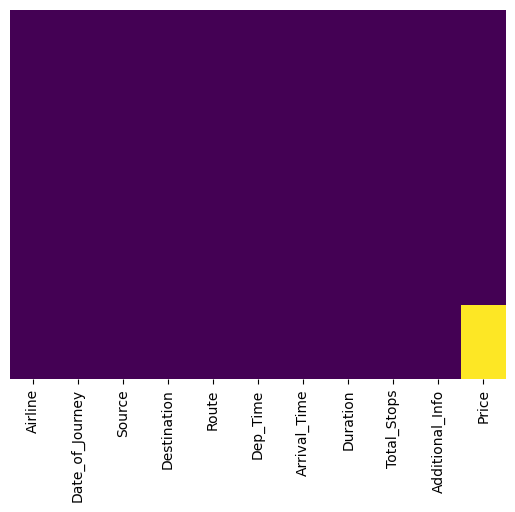

In [129]:
sns.heatmap(final.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [130]:
#applying feature engineering 
final['Date']=final['Date_of_Journey'].str.split('/').str[0]
final['Month']=final['Date_of_Journey'].str.split('/').str[1]
final['Year']=final['Date_of_Journey'].str.split('/').str[2]
print(final['Date'].head())
print(final['Month'].head())
print(final['Year'].head())

0    24
1     1
2     9
3    12
4    01
Name: Date, dtype: object
0    03
1    05
2    06
3    05
4    03
Name: Month, dtype: object
0    2019
1    2019
2    2019
3    2019
4    2019
Name: Year, dtype: object


In [131]:
final.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,03,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,05,2019


In [132]:
final.drop('Date_of_Journey', axis=1, inplace=True)

In [133]:
final.head(10)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,03,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,05,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,9,06,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,05,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,01,03,2019
5,SpiceJet,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info,3873.0,24,06,2019
6,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087.0,12,03,2019
7,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,08:00,05:05 02 Mar,21h 5m,1 stop,No info,22270.0,01,03,2019
8,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,08:55,10:25 13 Mar,25h 30m,1 stop,In-flight meal not included,11087.0,12,03,2019
9,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,11:25,19:15,7h 50m,1 stop,No info,8625.0,27,05,2019


In [134]:
final['Arrival_Time']=final['Arrival_Time'].str.split(' ').str[0]
final.head(10)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,non-stop,No info,3897.0,24,03,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,05,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2 stops,No info,13882.0,9,06,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,05,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,01,03,2019
5,SpiceJet,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info,3873.0,24,06,2019
6,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25,15h 30m,1 stop,In-flight meal not included,11087.0,12,03,2019
7,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,08:00,05:05,21h 5m,1 stop,No info,22270.0,01,03,2019
8,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,08:55,10:25,25h 30m,1 stop,In-flight meal not included,11087.0,12,03,2019
9,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,11:25,19:15,7h 50m,1 stop,No info,8625.0,27,05,2019


In [135]:
final['Arrival_Hour']=final['Arrival_Time'].str.split(':').str[0]
final['Arrival_Min']=final['Arrival_Time'].str.split(':').str[1]
final.head(10)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,non-stop,No info,3897.0,24,03,2019,01,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,05,2019,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2 stops,No info,13882.0,9,06,2019,04,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,05,2019,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,01,03,2019,21,35
5,SpiceJet,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info,3873.0,24,06,2019,11,25
6,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25,15h 30m,1 stop,In-flight meal not included,11087.0,12,03,2019,10,25
7,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,08:00,05:05,21h 5m,1 stop,No info,22270.0,01,03,2019,05,05
8,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,08:55,10:25,25h 30m,1 stop,In-flight meal not included,11087.0,12,03,2019,10,25
9,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,11:25,19:15,7h 50m,1 stop,No info,8625.0,27,05,2019,19,15


In [136]:
final.drop('Arrival_Time',axis=1,inplace=True)
final.head(10)

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,2h 50m,non-stop,No info,3897.0,24,03,2019,01,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,7h 25m,2 stops,No info,7662.0,1,05,2019,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,19h,2 stops,No info,13882.0,9,06,2019,04,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,5h 25m,1 stop,No info,6218.0,12,05,2019,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,4h 45m,1 stop,No info,13302.0,01,03,2019,21,35
5,SpiceJet,Kolkata,Banglore,CCU → BLR,09:00,2h 25m,non-stop,No info,3873.0,24,06,2019,11,25
6,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,18:55,15h 30m,1 stop,In-flight meal not included,11087.0,12,03,2019,10,25
7,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,08:00,21h 5m,1 stop,No info,22270.0,01,03,2019,05,05
8,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,08:55,25h 30m,1 stop,In-flight meal not included,11087.0,12,03,2019,10,25
9,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,11:25,7h 50m,1 stop,No info,8625.0,27,05,2019,19,15


In [137]:
final['Arrival_Hour']=final['Arrival_Hour'].astype(int)
final['Arrival_Min']=final['Arrival_Min'].astype(int)
final['Arrival_Hour']=final['Arrival_Hour'].astype(int)
final['Date']=final['Date'].astype(int)
final['Month']=final['Month'].astype(int)
final['Year']=final['Year'].astype(int)
final.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Source           13354 non-null  object 
 2   Destination      13354 non-null  object 
 3   Route            13353 non-null  object 
 4   Dep_Time         13354 non-null  object 
 5   Duration         13354 non-null  object 
 6   Total_Stops      13353 non-null  object 
 7   Additional_Info  13354 non-null  object 
 8   Price            10683 non-null  float64
 9   Date             13354 non-null  int32  
 10  Month            13354 non-null  int32  
 11  Year             13354 non-null  int32  
 12  Arrival_Hour     13354 non-null  int32  
 13  Arrival_Min      13354 non-null  int32  
dtypes: float64(1), int32(5), object(8)
memory usage: 1.3+ MB


In [138]:
final['Dep_hour']=final['Dep_Time'].str.split(':').str[0]
final['Dep_min']=final['Dep_Time'].str.split(':').str[1]
final['Dep_min']=final['Dep_min'].astype(int)
final['Dep_hour']=final['Dep_hour'].astype(int)
final.head()

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_Min,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,2h 50m,non-stop,No info,3897.0,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,7h 25m,2 stops,No info,7662.0,1,5,2019,13,15,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,19h,2 stops,No info,13882.0,9,6,2019,4,25,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,5h 25m,1 stop,No info,6218.0,12,5,2019,23,30,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,4h 45m,1 stop,No info,13302.0,1,3,2019,21,35,16,50


In [139]:
final.drop('Dep_Time',axis=1,inplace=True)
final.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_Min,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897.0,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662.0,1,5,2019,13,15,5,50


In [140]:
final.drop('Route',axis=1,inplace=True)

In [141]:
final['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [142]:
final['Total_Stops'].isnull().sum()

1

In [143]:
final[final['Total_Stops'].isnull()]

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_Min,Dep_hour,Dep_min
9039,Air India,Delhi,Cochin,23h 40m,NaN,No info,7480.0,6,5,2019,9,25,9,45


In [144]:
final['Total_Stops']=final['Total_Stops'].map({'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, 'nan':1, '4 stops':4})
final.head(2)

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_Min,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,2h 50m,0.0,No info,3897.0,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,7h 25m,2.0,No info,7662.0,1,5,2019,13,15,5,50


In [145]:
final['Duration_hour']=final['Duration'].str.split(' ').str[0].str.split('h').str[0]

In [146]:
final.head(2)

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_Min,Dep_hour,Dep_min,Duration_hour
0,IndiGo,Banglore,New Delhi,2h 50m,0.0,No info,3897.0,24,3,2019,1,10,22,20,2
1,Air India,Kolkata,Banglore,7h 25m,2.0,No info,7662.0,1,5,2019,13,15,5,50,7


In [147]:
final[final['Duration_hour']=='5m']

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_Min,Dep_hour,Dep_min,Duration_hour
6474,Air India,Mumbai,Hyderabad,5m,2.0,No info,17327.0,6,3,2019,16,55,16,50,5m
2660,Air India,Mumbai,Hyderabad,5m,2.0,No info,NaN,12,3,2019,16,55,16,50,5m


In [148]:
final.drop(6474,axis=0,inplace=True)
final.drop(2660,axis=0,inplace=True)

In [149]:
final['Duration_hour'].astype(int)

0        2
1        7
2       19
3        5
4        4
        ..
2666    23
2667     2
2668     6
2669    15
2670    14
Name: Duration_hour, Length: 13351, dtype: int32

In [150]:
final['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [151]:
final['Additional_Info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [152]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()

In [153]:
final['Airline']=labelencoder.fit_transform(final['Airline'])
final['Source']=labelencoder.fit_transform(final['Source'])
final['Destination']=labelencoder.fit_transform(final['Destination'])
final['Additional_Info']=labelencoder.fit_transform(final['Additional_Info'])

In [154]:
final.head(10)

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_Min,Dep_hour,Dep_min,Duration_hour
0,3,0,5,2h 50m,0.0,8,3897.0,24,3,2019,1,10,22,20,2
1,1,3,0,7h 25m,2.0,8,7662.0,1,5,2019,13,15,5,50,7
2,4,2,1,19h,2.0,8,13882.0,9,6,2019,4,25,9,25,19
3,3,3,0,5h 25m,1.0,8,6218.0,12,5,2019,23,30,18,5,5
4,3,0,5,4h 45m,1.0,8,13302.0,1,3,2019,21,35,16,50,4
5,8,3,0,2h 25m,0.0,8,3873.0,24,6,2019,11,25,9,0,2
6,4,0,5,15h 30m,1.0,5,11087.0,12,3,2019,10,25,18,55,15
7,4,0,5,21h 5m,1.0,8,22270.0,1,3,2019,5,5,8,0,21
8,4,0,5,25h 30m,1.0,5,11087.0,12,3,2019,10,25,8,55,25
9,6,2,1,7h 50m,1.0,8,8625.0,27,5,2019,19,15,11,25,7
